# Preprocessing

### Importing & Cleaning

In [1]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import confusion_matrix, classification_report
# import re
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# # Load stop words
# stop_words = set(stopwords.words('english'))

# # Load the dataset


# def load_data(filepath_pos, filepath_neg):
#     with open(filepath_pos, 'r', encoding='latin-1') as pos_file, open(filepath_neg, 'r', encoding='latin-1') as neg_file:
#         positive_sentences = pos_file.readlines()
#         negative_sentences = neg_file.readlines()
#     return positive_sentences, negative_sentences


# positive, negative = load_data(
#     'dataset/rt-polarity.pos', 'dataset/rt-polarity.neg')

# # Splitting the dataset into train (4000 each), validation (500 each), and test sets (831 each)
# train_pos, val_pos, test_pos = positive[:
#                                         4000], positive[4000:4500], positive[4500:]
# train_neg, val_neg, test_neg = negative[:
#                                         4000], negative[4000:4500], negative[4500:]

# train_data = train_pos + train_neg
# val_data = val_pos + val_neg
# test_data = test_pos + test_neg

# train_labels = [1]*4000 + [0]*4000
# val_labels = [1]*500 + [0]*500
# test_labels = [1]*831 + [0]*831

# # Clean and vectorize data


# def clean_text(text):
#     # Remove digits, punctuation, and convert to lowercase
#     text = re.sub(r'\d+', '', text)  # Remove digits
#     text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#     text = text.lower().strip()

#     # Remove stop words
#     tokens = text.split()
#     tokens = [word for word in tokens if word not in stop_words]
#     return ' '.join(tokens)


# # Clean the datasets
# train_data = [clean_text(sent) for sent in train_data]
# val_data = [clean_text(sent) for sent in val_data]
# test_data = [clean_text(sent) for sent in test_data]

# # Vectorization using TF-IDF
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train = vectorizer.fit_transform(train_data).toarray()
# X_val = vectorizer.transform(val_data).toarray()
# X_test = vectorizer.transform(test_data).toarray()

# y_train, y_val, y_test = train_labels, val_labels, test_labels
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Initialize the PorterStemmer
ps = PorterStemmer()

# Load the dataset


def load_data(filepath_pos, filepath_neg):
    with open(filepath_pos, 'r', encoding='latin-1') as pos_file, open(filepath_neg, 'r', encoding='latin-1') as neg_file:
        positive_sentences = pos_file.readlines()
        negative_sentences = neg_file.readlines()
    return positive_sentences, negative_sentences


positive, negative = load_data(
    'dataset/rt-polarity.pos', 'dataset/rt-polarity.neg')

# Splitting the dataset into train (4000 each), validation (500 each), and test sets (831 each)
train_pos, val_pos, test_pos = positive[:
                                        4000], positive[4000:4500], positive[4500:]
train_neg, val_neg, test_neg = negative[:
                                        4000], negative[4000:4500], negative[4500:]

train_data = train_pos + train_neg
val_data = val_pos + val_neg
test_data = test_pos + test_neg

train_labels = [1]*4000 + [0]*4000
val_labels = [1]*500 + [0]*500
test_labels = [1]*831 + [0]*831

# Clean and stem the data


def clean_text(text):
    # Remove digits, punctuation, and convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces

    # Tokenize and remove stop words
    tokens = text.split()
    # Apply stemming and remove stopwords
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


# Clean the datasets using the clean_text function
train_data = [clean_text(sent) for sent in train_data]
val_data = [clean_text(sent) for sent in val_data]
test_data = [clean_text(sent) for sent in test_data]

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data).toarray()
X_val = vectorizer.transform(val_data).toarray()
X_test = vectorizer.transform(test_data).toarray()

y_train, y_val, y_test = train_labels, val_labels, test_labels

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Save the vectorizer
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

### Word Cloud for Positive and Negative Words

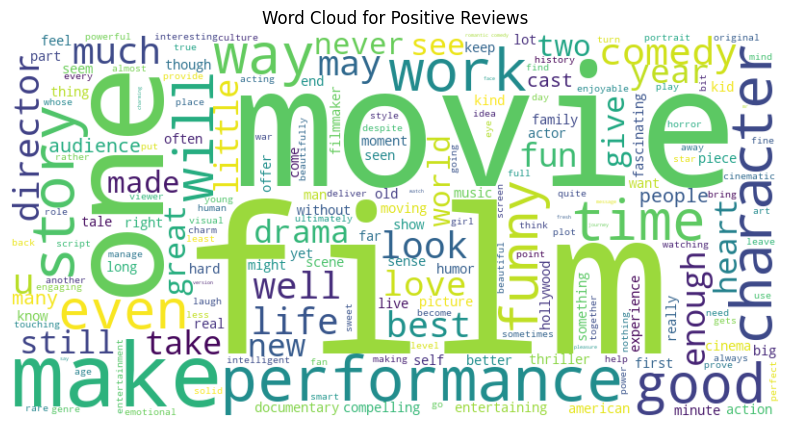

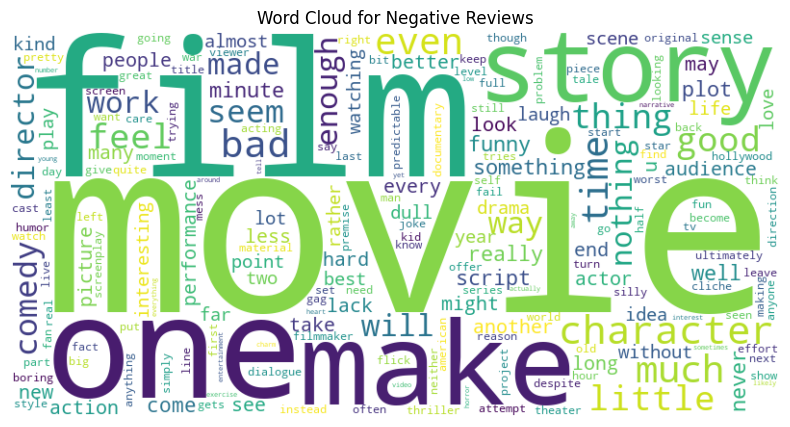

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for positive and negative reviews
positive_text = ' '.join(train_pos)
negative_text = ' '.join(train_neg)

# Word cloud for positive words
wordcloud_pos = WordCloud(width=800, height=400,
                          background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Word cloud for negative words
wordcloud_neg = WordCloud(width=800, height=400,
                          background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

### Word Frequency Bar Plot

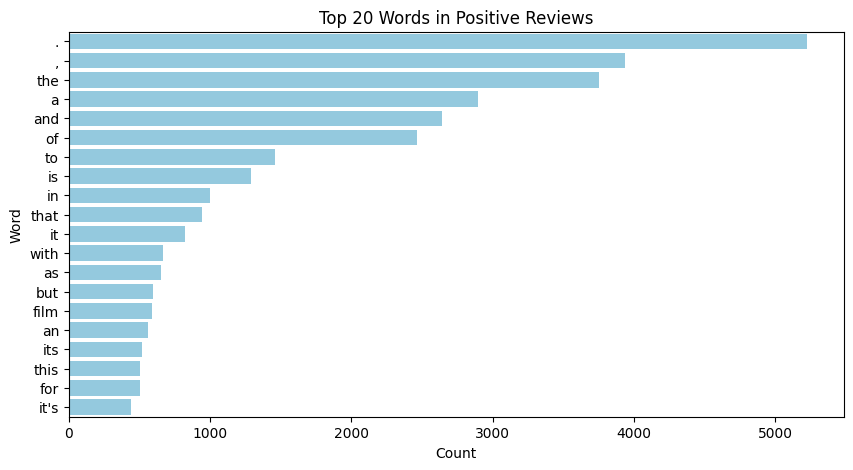

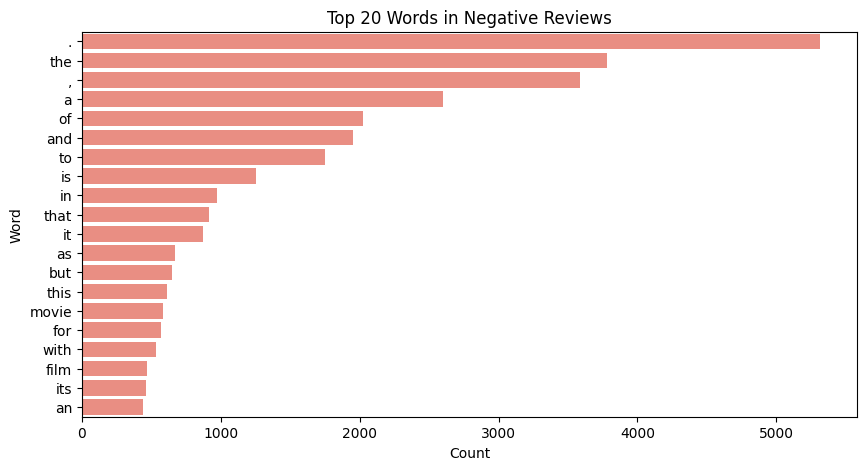

In [39]:
from collections import Counter
import seaborn as sns

# Get word frequencies for positive and negative reviews
positive_words = ' '.join(train_pos).split()
negative_words = ' '.join(train_neg).split()

# Count word occurrences
positive_word_count = Counter(positive_words)
negative_word_count = Counter(negative_words)

# Top 20 most common words in positive reviews
top_pos_words = pd.DataFrame(
    positive_word_count.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=top_pos_words, color="skyblue")
plt.title("Top 20 Words in Positive Reviews")
plt.show()

# Top 20 most common words in negative reviews
top_neg_words = pd.DataFrame(
    negative_word_count.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=top_neg_words, color="salmon")
plt.title("Top 20 Words in Negative Reviews")
plt.show()

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)

# Evaluate on the test set
y_pred = log_reg.predict(X_test)

# Performance Metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[636 195]
 [215 616]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       831
           1       0.76      0.74      0.75       831

    accuracy                           0.75      1662
   macro avg       0.75      0.75      0.75      1662
weighted avg       0.75      0.75      0.75      1662



### Saving

In [41]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

### CM

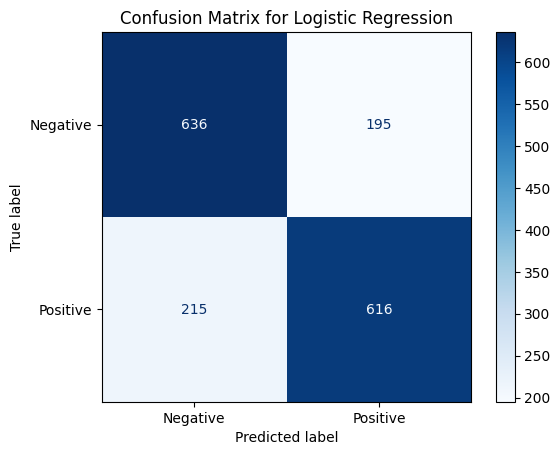

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
                              'Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# SVM Classifier

In [43]:
from sklearn.svm import SVC

# Support Vector Machine Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_svm = svm_model.predict(X_test)

# Performance Metrics
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[633 198]
 [214 617]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       831
           1       0.76      0.74      0.75       831

    accuracy                           0.75      1662
   macro avg       0.75      0.75      0.75      1662
weighted avg       0.75      0.75      0.75      1662



### Saving

In [44]:
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

### CM

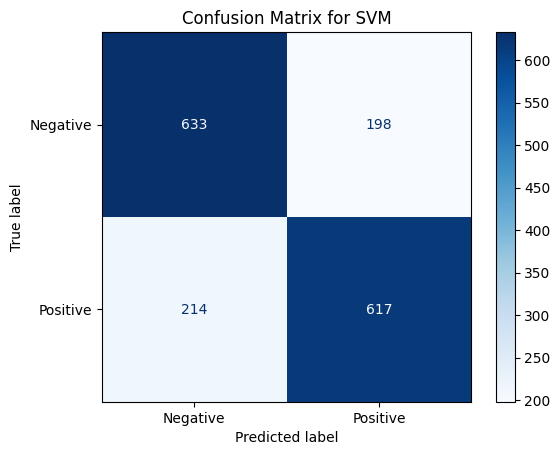

In [45]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[
                              'Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()

# LSTM

In [46]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenization and Padding for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)
X_train_seq = tokenizer.texts_to_sequences(train_data)
X_val_seq = tokenizer.texts_to_sequences(val_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

# Pad sequences
max_len = 100  # Define max sequence length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_len)
X_val_seq = pad_sequences(X_val_seq, maxlen=max_len)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train, epochs=5, batch_size=64,
          validation_data=(X_val_seq, y_val))

# Evaluate on the test set
y_pred_lstm = (model.predict(X_test_seq) > 0.5).astype("int32")

# Performance Metrics
print(confusion_matrix(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

c:\Users\iamva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - accuracy: 0.5813 - loss: 0.6676 - val_accuracy: 0.7500 - val_loss: 0.5074
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.8278 - loss: 0.3942 - val_accuracy: 0.7560 - val_loss: 0.4984
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.8859 - loss: 0.2779 - val_accuracy: 0.7450 - val_loss: 0.5263
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9174 - loss: 0.2212 - val_accuracy: 0.7370 - val_loss: 0.6006
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.9392 - loss: 0.1728 - val_accuracy: 0.7470 - val_loss: 0.7066
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
[[601 230]
 [218 613]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       831
           1       0.73      0.74      0.73       831

    accuracy                           0.73      1662
   macro avg       0.73      0.73      0.73      1662
weighted avg   

### Saving

In [47]:
model.save('lstm_model.keras')

### CM

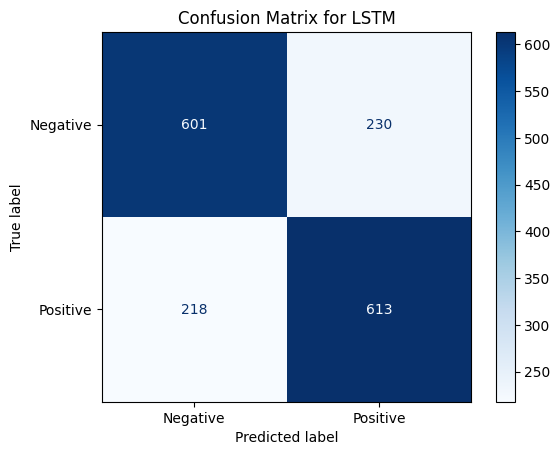

In [48]:
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=[
                              'Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for LSTM")
plt.show()

# Comparisions

### P-R & F1

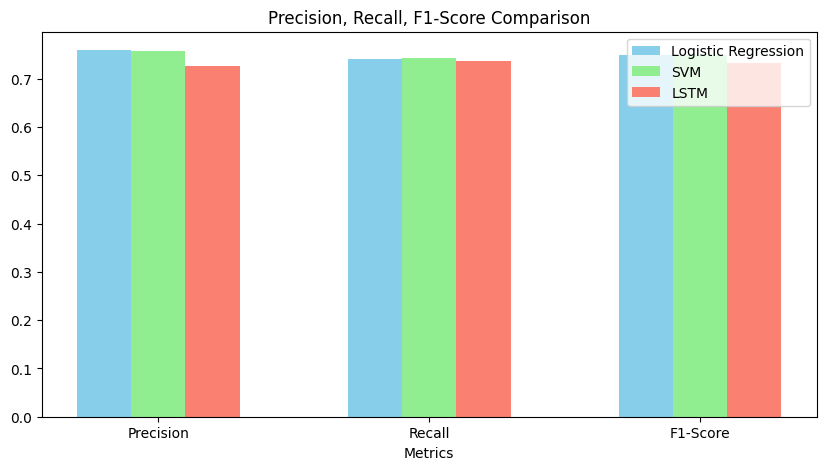

In [49]:
import numpy as np

# Classification report for Logistic Regression
report_lr = classification_report(y_test, y_pred, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_lstm = classification_report(y_test, y_pred_lstm, output_dict=True)

# Extract precision, recall, and F1-scores for each model
metrics_lr = [report_lr['1']['precision'], report_lr['1']
              ['recall'], report_lr['1']['f1-score']]
metrics_svm = [report_svm['1']['precision'],
               report_svm['1']['recall'], report_svm['1']['f1-score']]
metrics_lstm = [report_lstm['1']['precision'],
                report_lstm['1']['recall'], report_lstm['1']['f1-score']]

# Create a bar plot to compare metrics
labels = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))  # label locations

fig, ax = plt.subplots(figsize=(10, 5))
width = 0.2  # width of the bars

ax.bar(x - width, metrics_lr, width,
       label='Logistic Regression', color='skyblue')
ax.bar(x, metrics_svm, width, label='SVM', color='lightgreen')
ax.bar(x + width, metrics_lstm, width, label='LSTM', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Precision, Recall, F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### ROC Curve

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


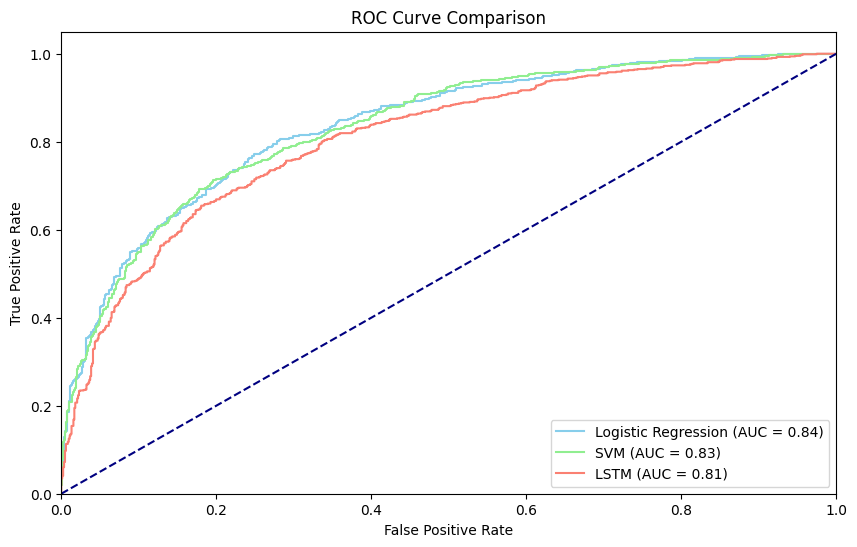

In [50]:
from sklearn.metrics import roc_curve, auc

# For Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# For SVM (Note: SVC doesn't output probabilities unless you use `probability=True` when initializing)
y_pred_proba_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# For LSTM
y_pred_proba_lstm = model.predict(X_test_seq)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {
         roc_auc_lr:.2f})', color='skyblue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {
         roc_auc_svm:.2f})', color='lightgreen')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {
         roc_auc_lstm:.2f})', color='salmon')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()